In [1]:
# Enable interactive plot
%matplotlib notebook

In [2]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)

numpy: 1.21.1
matplotlib: 3.4.2


In [3]:
#All units are in S.I. system

N = 150 # Meshsize
fps = 10 # frames per sec
z_max = 50 # maximum z value
w_0 = 0.001 # Beam Waste
E_0 = 0.05 #Energy Amplitude
k = 2*np.pi/(632*(10**-9)) #Wave Number
z_R = np.pi*(w_0**2)/(632*(10**-9)) #Rayleigh Length
eta = 377 #Wave Impedance

x = np.linspace(-0.004,0.004,N+1)
x, y = np.meshgrid(x, x)
zarray = np.zeros((N+1, N+1, z_max))

w = lambda z : np.sqrt((w_0**2)*(1+(z/z_R)**2))

r = lambda x, y : np.sqrt(x**2 + y**2)

R = lambda z : z + ((z_R**2)/z)

a = lambda w, r : (E_0*w_0/w)*np.exp(-(r**2)/(w**2))

b = lambda r, R : np.exp(-1j*k*(r**2)/(2*R))

c = lambda z : np.exp(-1j*(k*z) +1j*np.arctan(z/z_R))

f = lambda a, b, c : a*b*c

for i in range(1,z_max):
    zarray[:,:,i] = (10**6)*(f(a(w(i),r(x,y)), b(r(x,y),R(i)), c(i))*np.conj(f(a(w(i),r(x,y)), b(r(x,y),R(i)), c(i))))/(2*eta)

<ipython-input-3-58736979dfb0>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  zarray[:,:,i] = (10**6)*(f(a(w(i),r(x,y)), b(r(x,y),R(i)), c(i))*np.conj(f(a(w(i),r(x,y)), b(r(x,y),R(i)), c(i))))/(2*eta)


<IPython.core.display.Javascript object>


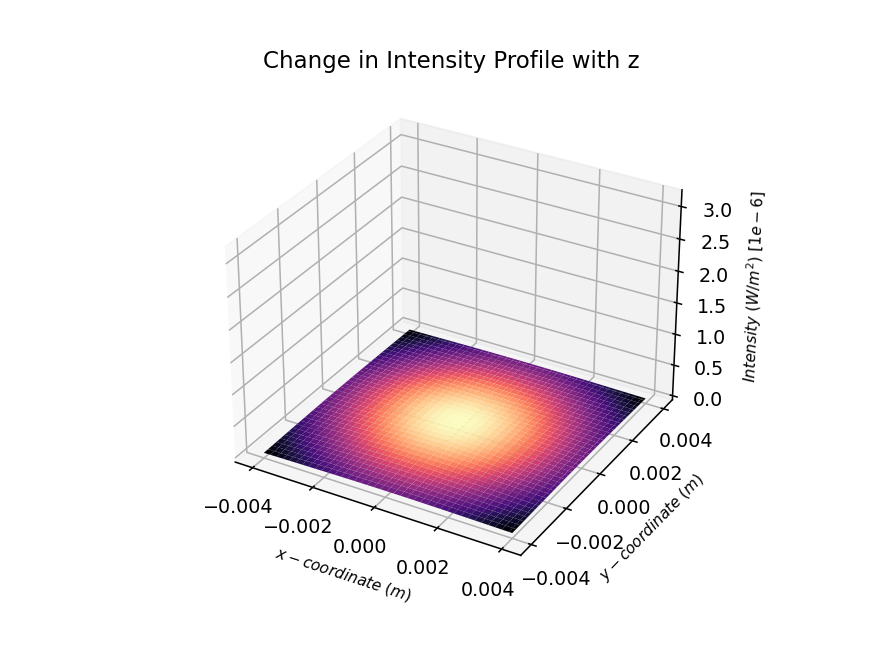

In [4]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, zarray[:,:,frame_number], cmap="magma")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel(r"$Intensity\ (W/m^2)\ [1e-6]$", fontsize=8)
ax.set_xlabel(r"$x-coordinate\ (m)$", fontsize=8)
ax.set_ylabel(r"$y-coordinate\ (m)$", fontsize=8)
ax.set_title(r"Change in Intensity Profile with z")

plot = [ax.plot_surface(x, y, zarray[:,:,0], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(0,np.max(zarray))
ani = animation.FuncAnimation(fig, update_plot, z_max, fargs=(zarray, plot), interval=1000/fps)